<a href="https://colab.research.google.com/github/rishitharaj/Deep-Learning/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder Implementation

You are required to build and train a basic autoencoder using the MNIST dataset
(handwritten digits).
1. Model Design
- Implement an encoder that compresses a 28×28 grayscale image into a smaller
latent representation.
- Implement a decoder that reconstructs the original image from this latent space.
2. Model Training
- Train the autoencoder on the MNIST training dataset.
- Evaluate its performance using the test dataset.
3. Model Evaluation and Visualization
- Display the model summary.
- Plot the training and validation loss curves.
- Show a side-by-side comparison of original vs reconstructed images from the
test set.

Deliverables
- Model summary of your autoencoder.
- Training vs validation loss curves.
- Side-by-side comparison plots (original vs reconstructed images).
- Short explanation of results (1–2 paragraphs).

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load and preprocess MNIST

(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values (0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape to (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)



In [28]:
# Build Autoencoder Model


# Encoder
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Flatten()(input_img)
x = layers.Dense(128, activation="relu")(x)
latent = layers.Dense(32, activation="relu")(x)  # latent representation

# Decoder
x = layers.Dense(128, activation="relu")(latent)
x = layers.Dense(28 * 28, activation="sigmoid")(x)
output_img = layers.Reshape((28, 28, 1))(x)

# Autoencoder model
autoencoder = models.Model(input_img, output_img)
autoencoder.compile(optimizer="adam", loss="mse")



In [29]:
# Model Summary

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,968 (820.19 KB)

 Trainable params: 209,968 (820.19 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Training the Model

history = autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0931 - val_loss: 0.0334
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0300 - val_loss: 0.0218
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0210 - val_loss: 0.0182
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0179 - val_loss: 0.0164
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0165 - val_loss: 0.0153
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0155 - val_loss: 0.0148
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0150 - val_loss: 0.0141
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0145 - val_loss: 0.0137
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0139 - val_loss: 0.0132
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0134 - val_loss: 0.0128


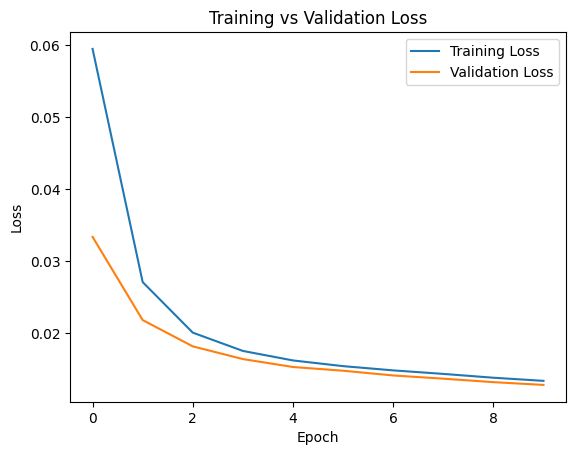

In [31]:
# Plot Training vs Validation Loss

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()



**Observations**
- Validation loss following a similar trend.
- Indicates the model learns meaningful compression.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


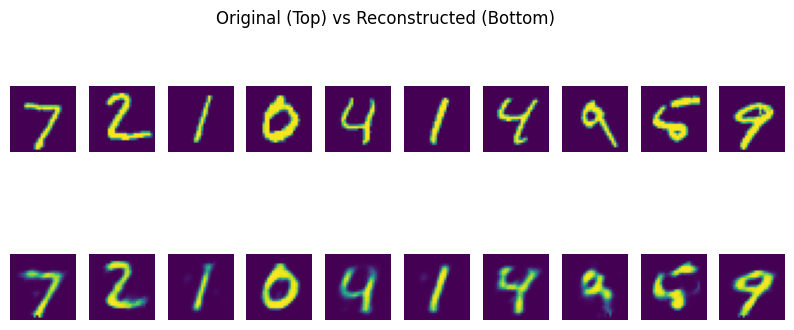

In [32]:
# Reconstruction Visualization

decoded_imgs = autoencoder.predict(x_test[:10])

plt.figure(figsize=(10, 4))

for i in range(10):
    # Original images
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.axis("off")

    # Reconstructed images
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.axis("off")

plt.suptitle("Original (Top) vs Reconstructed (Bottom)")
plt.show()


**Observations**
- Reconstructed digits look slightly blurred but recognizable.
- Shows the autoencoder learned key digit features.

##**Remarks**

The autoencoder successfully learned to compress and reconstruct MNIST digit images. During training, both training and validation loss decreased steadily, indicating that the model learned meaningful latent representations without significant overfitting. The latent space of size 32 was sufficient to capture essential features of handwritten digits.

The reconstructed images closely resemble the original digits, although some fine details are lost due to compression. This demonstrates that the autoencoder effectively extracts important visual patterns while discarding less relevant information. Overall, the model proves the effectiveness of neural networks in dimensionality reduction and image reconstruction tasks.